## Problem Statement: Identify either note is Genuine or not using predictive modelling  and with the help of Decision tree

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns

In [10]:
df = pd.read_csv('banknotes.csv')
df.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


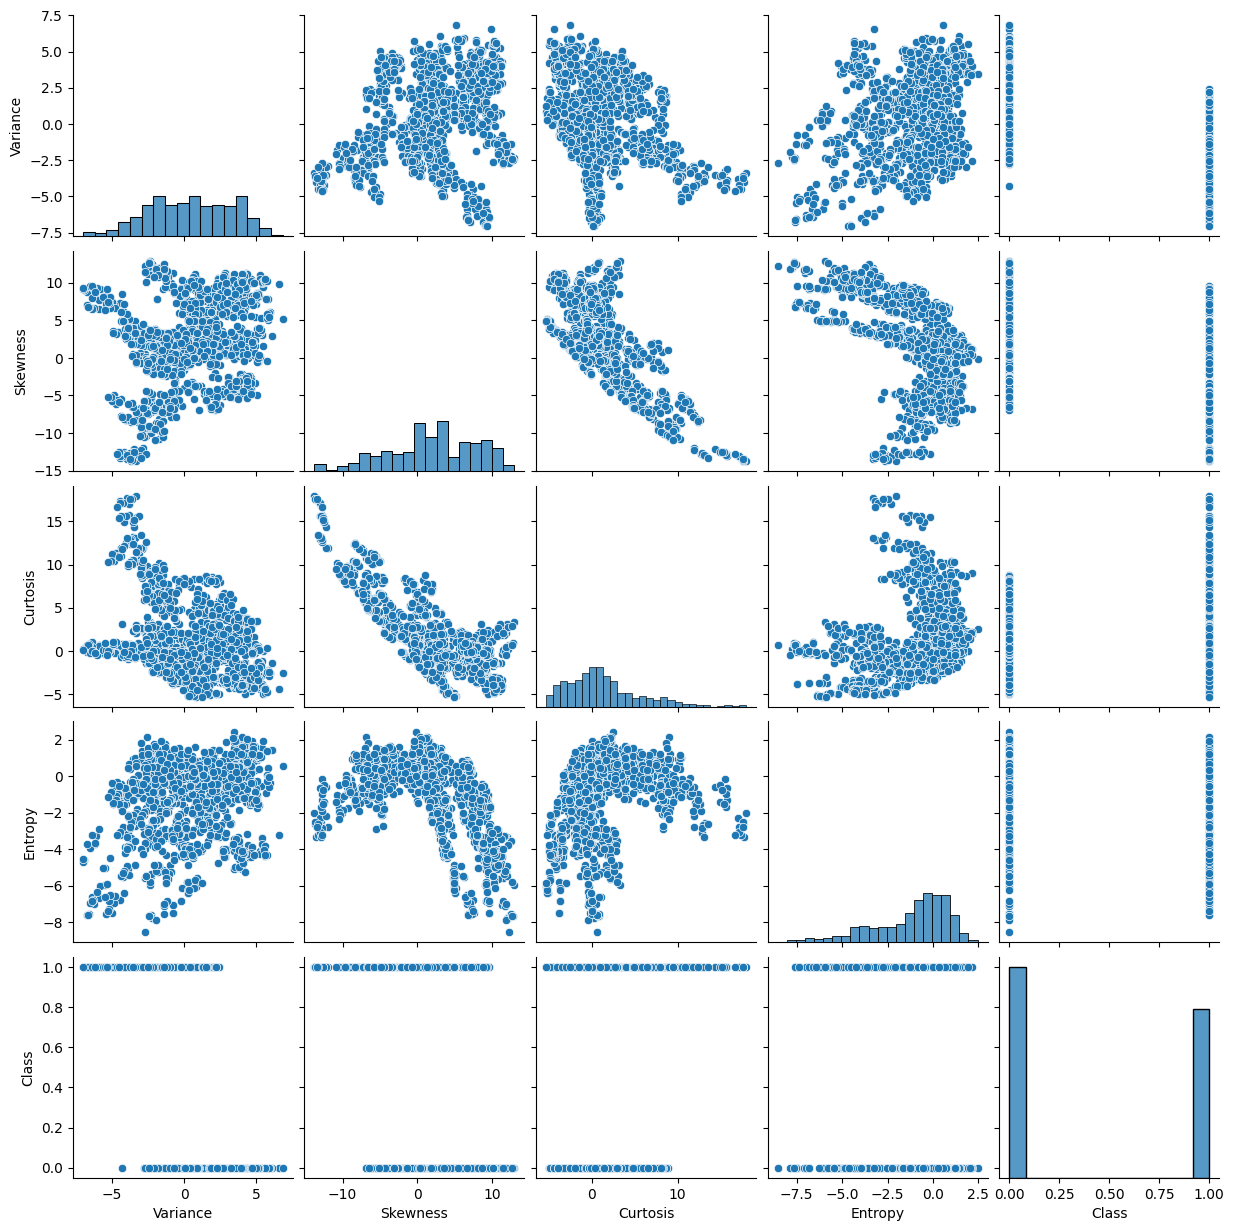

In [11]:
sns.pairplot(df)

In [12]:
# lets Create input and output data
X = df.drop(columns='Class')
X[:3]

,Variance,Skewness,Curtosis,Entropy
0,3.6216,8.6661,-2.8073,-0.44699
1,4.5459,8.1674,-2.4586,-1.46210
2,3.8660,-2.6383,1.9242,0.10645


In [13]:
y = df['Class']
y[:3]

0    0
1    0
2    0
Name: Class, dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Curtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [15]:
# splitting the dataset
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=1)

In [17]:
y_test[:2]

1240    1
703     0
Name: Class, dtype: int64

In [18]:
y_test.value_counts()/len(y_test)*100

Class
0    57.090909
1    42.909091
Name: count, dtype: float64

In [19]:
y.value_counts()

Class
0    762
1    610
Name: count, dtype: int64

In [20]:
# Import Descision tree algo
#from sklearn.tree import DecisionTreeRegressor

# current problem is binary classification problem
# hence classifier wil be used
from sklearn.tree import DecisionTreeClassifier

In [21]:
DecisionTreeClassifier

sklearn.tree._classes.DecisionTreeClassifier

In [22]:
model = DecisionTreeClassifier()  #DT is with its default arguments

In [23]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [24]:
model.classes_

array([0, 1], dtype=int64)

In [25]:
# prediction
y_pred = model.predict(X_test)
y_pred[:5] #predicted result

array([1, 0, 1, 1, 0], dtype=int64)

In [26]:
y_test[:5].values #actual result

array([1, 0, 1, 1, 0], dtype=int64)

In [27]:
# Lets check trianing data score
model.score(X_train,y_train)*100

100.0

In [28]:
model.score(X_test,y_test)*100

97.45454545454545

In [29]:
#performance metrics
from sklearn.metrics import confusion_matrix,classification_report

In [30]:
confusion_matrix(y_test,y_pred)

array([[153,   4],
       [  3, 115]], dtype=int64)

In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       157
           1       0.97      0.97      0.97       118

    accuracy                           0.97       275
   macro avg       0.97      0.97      0.97       275
weighted avg       0.97      0.97      0.97       275



In [32]:
model.criterion

'gini'

## Lets change criterion= 'entropy'

In [33]:
# Lest apply entropy
model2 = DecisionTreeClassifier(criterion='entropy')

In [34]:
model2.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [35]:
y_pred2 = model2.predict(X_test)
y_pred2[:6]

array([1, 0, 1, 1, 0, 0], dtype=int64)

In [36]:
confusion_matrix(y_test,y_pred2)

array([[157,   0],
       [  0, 118]], dtype=int64)

In [37]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00       118

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



# DT visualization

In [43]:
from sklearn import tree

In [44]:
X = df.iloc[:,:-1]
X[:2]

,Variance,Skewness,Curtosis,Entropy
0,3.6216,8.6661,-2.8073,-0.44699
1,4.5459,8.1674,-2.4586,-1.46210


In [45]:
X.columns

Index(['Variance', 'Skewness', 'Curtosis', 'Entropy'], dtype='object')

In [62]:
model2

DecisionTreeClassifier(criterion='entropy')

#### Textual representation of Decision Tree

In [52]:
# text_representation = tree.export_text(model2,feature_names=['Variance', 'Skewness', 'Curtosis', 'Entropy'],
#                                       class_names=['Fake','Genuine'])
# print(text_representation)

In [53]:
import matplotlib.pyplot as plt

In [54]:
X.shape

(1372, 4)

In [56]:
X_train.shape

(1097, 4)

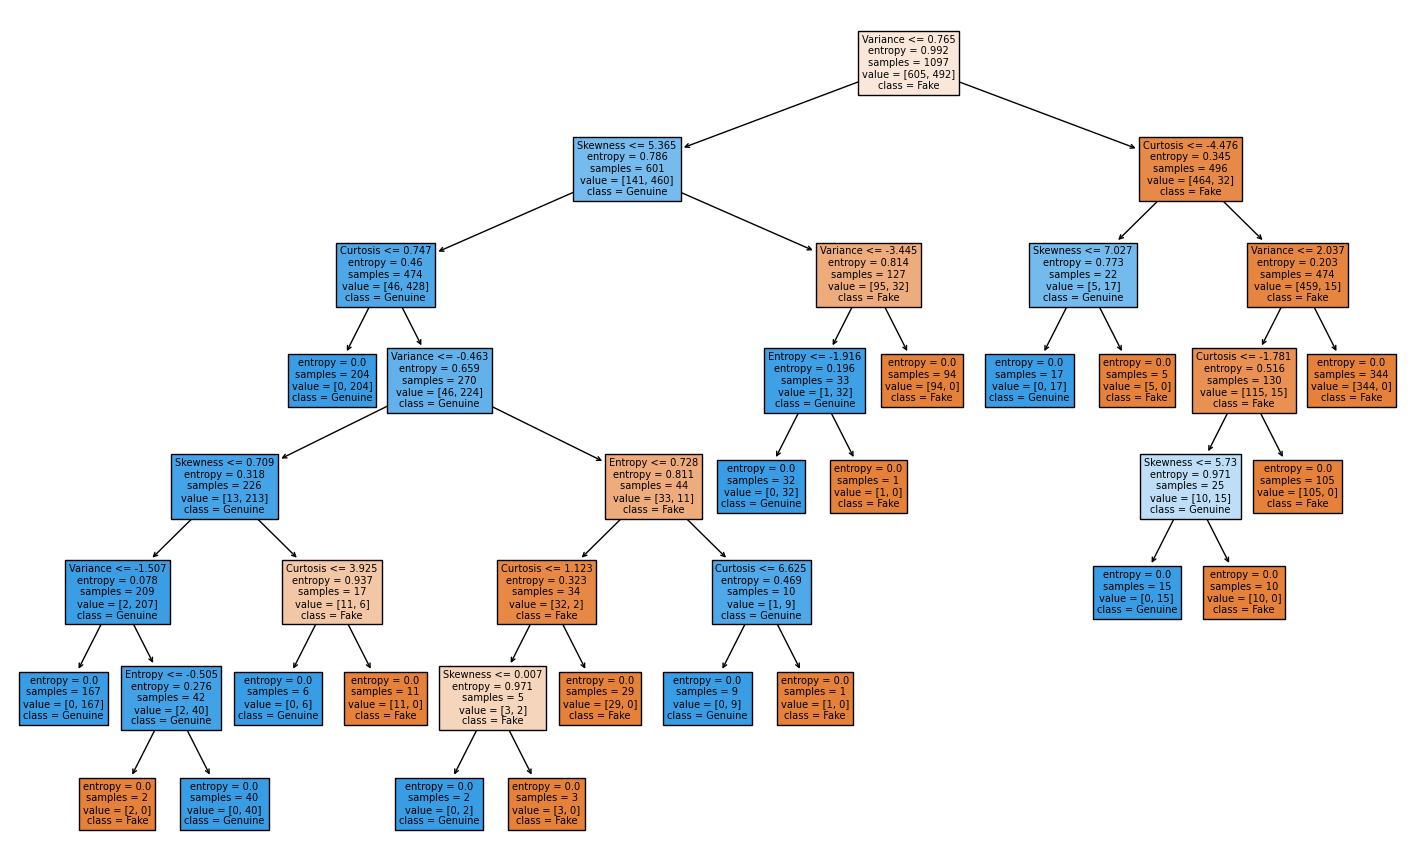

In [57]:
fig = plt.figure(figsize=(18,11))
_ = tree.plot_tree(model2,
                   feature_names=['Variance', 'Skewness', 'Curtosis', 'Entropy'],
                   class_names=['Fake','Genuine'],
                   filled=True)
plt.savefig('march_tree.png',dpi=80)

In [58]:
len(X_train)

1097

In [59]:
sum(y_train==0),sum(y_train==1)

(605, 492)

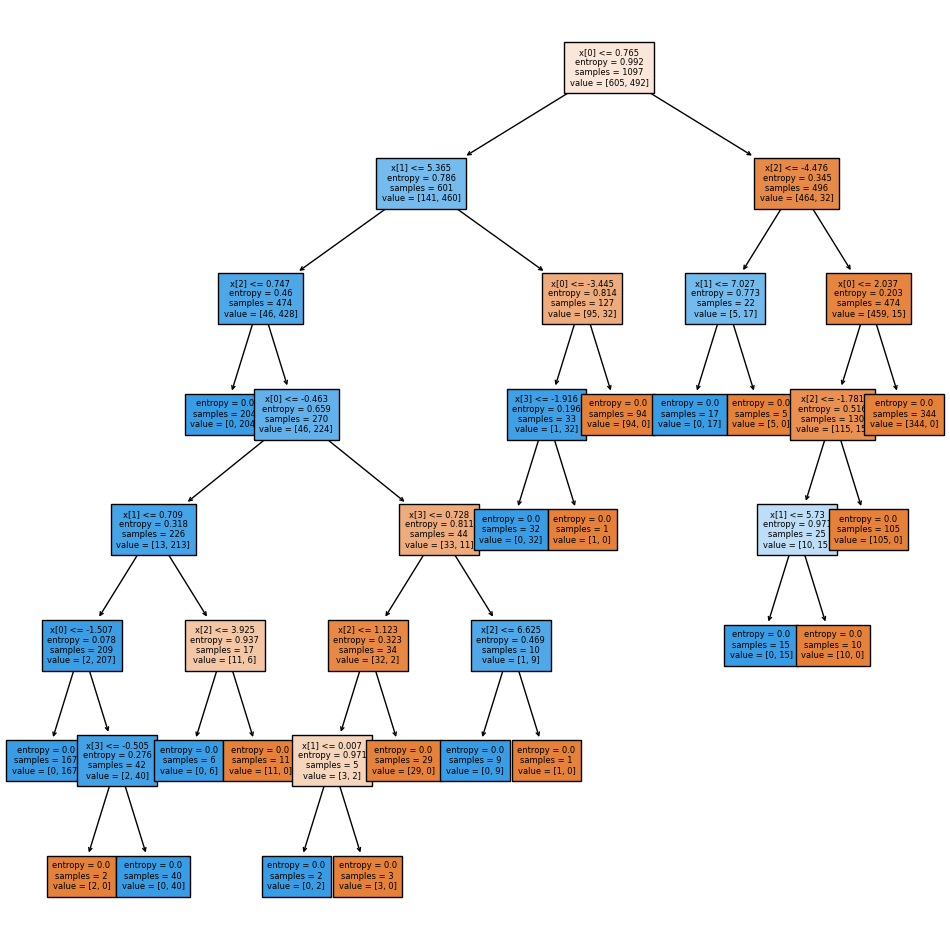

In [60]:
plt.figure(figsize=(12,12))
tree.plot_tree(model2, fontsize=6,filled=True)
plt.savefig('cns_tree_high_dpi', dpi=300)

<!-- USING  -->
<h1>Stratified Kfold</h1>
<h1>K-Fold Cross-Validation</h1> 


In [107]:
import pandas as pd
df = pd.read_csv('banknotes.csv')
df.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [108]:
X = df.iloc[:,:-1]
X[:2]

,Variance,Skewness,Curtosis,Entropy
0,3.6216,8.6661,-2.8073,-0.44699
1,4.5459,8.1674,-2.4586,-1.46210


In [109]:
y = df['Class']
y[:2]

0    0
1    0
Name: Class, dtype: int64

In [110]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2)

In [111]:
from sklearn.tree import DecisionTreeClassifier

In [112]:
DecisionTreeClassifier?

Init signature:
DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
)
Docstring:     
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy", "log_loss"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "log_loss" and "entropy" both for the
    Shannon information gain, see :ref:`tree_mathematical_formulation`.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None
    The maximum depth o

In [113]:
# lets use a DT model with default parameters
m1 = DecisionTreeClassifier()
m1.fit(X_train,y_train)
print(m1.score(X_train,y_train)*100)
print(m1.score(X_test,y_test)*100)

100.0
98.18181818181819


In [114]:
#lets change some parameter values
m2 = DecisionTreeClassifier(criterion='gini',
    splitter='best',
    max_depth=4,
    min_samples_split=2,
    min_samples_leaf=2,
    min_weight_fraction_leaf=0.5)
m2.fit(X_train,y_train)
print(m2.score(X_train,y_train)*100)
print(m2.score(X_test,y_test)*100)

54.69462169553327
58.909090909090914


In [ ]:
# In HyperParamter tuning following algorithms we can prefer
# - GridSearchCV
# - RandomizedSearchCV

In [12]:
from sklearn.model_selection import GridSearchCV

In [13]:
GridSearchCV?

In [ ]:
"""
GridSearchCV(
    estimator,--> object of algorithm
    param_grid,---> dict of parameter and its multiple options
"""

In [14]:
pr_grid = {
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth':[2,3,4,5,6,8],
    'min_samples_split':[2,3],
    'min_samples_leaf':[1,2],
    'min_weight_fraction_leaf':[0.0,0.2,0.4,0.5]
    }

In [19]:
pr_grid

{'criterion': ['gini', 'entropy'],
 'splitter': ['best', 'random'],
 'max_depth': [2, 3, 4, 5, 6, 8],
 'min_samples_split': [2, 3],
 'min_samples_leaf': [1, 2],
 'min_weight_fraction_leaf': [0.0, 0.2, 0.4, 0.5]}

In [15]:
"""
GridSearchCV(
    estimator,
    param_grid,
"""
#model = DecisionTreeClassifier()
print(m1)
#lets create an object of GridSearchCV
out = GridSearchCV(m1,pr_grid)

DecisionTreeClassifier()


In [16]:
out

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 8],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'min_weight_fraction_leaf': [0.0, 0.2, 0.4, 0.5],
                         'splitter': ['best', 'random']})

In [17]:
X[:2]

,Variance,Skewness,Curtosis,Entropy
0,3.6216,8.6661,-2.8073,-0.44699
1,4.5459,8.1674,-2.4586,-1.46210


In [18]:
y[:2]

,Class
0,0
1,0


In [20]:
# Train ove X and Y using GridSearchCV object
out.fit(X,y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 8],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'min_weight_fraction_leaf': [0.0, 0.2, 0.4, 0.5],
                         'splitter': ['best', 'random']})

In [21]:
pr_grid

{'criterion': ['gini', 'entropy'],
 'splitter': ['best', 'random'],
 'max_depth': [2, 3, 4, 5, 6, 8],
 'min_samples_split': [2, 3],
 'min_samples_leaf': [1, 2],
 'min_weight_fraction_leaf': [0.0, 0.2, 0.4, 0.5]}

In [22]:
out.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'splitter': 'best'}

In [23]:
out.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [8]:
final = DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [9]:
final.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [10]:
final.score(X,y)*100

100.0

In [28]:
final.score(X_train,y_train)*100

100.0

In [29]:
final.score(X_test,y_test)*100

100.0

In [30]:
#cross validation
from sklearn.model_selection import cross_val_score

In [31]:
final

DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [32]:
(cross_val_score(final,X,y)*100).mean()

98.76151293961513

In [ ]:
# Assigment: Check Confusion Matrix and plot
# Check Precision Recall and F1 score
# plot AUC and ROC curve

In [33]:
# lets check for SVM
from sklearn.svm import SVC
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear','poly']}
gcv = GridSearchCV(SVC(),param_grid)

In [34]:
gcv.fit(X,y)  #takes lot of time

KeyboardInterrupt: 

In [15]:
df[:2]

,Variance,Skewness,Curtosis,Entropy,Class
0,3.6216,8.6661,-2.8073,-0.44699,0
1,4.5459,8.1674,-2.4586,-1.46210,0


In [1]:
import pickle

In [11]:
final

DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [12]:
# save the DT_model to disk
#filename = 'cns_june.pickle'
#pickle.dump(final, open(filename, 'wb'))

# dump the final model in iteration_1.pickle
# dump final model into iteration_1.pickle
pickle.dump(final, open(r'iteration_1.pickle', 'wb'))

In [14]:
import sklearn
sklearn.show_versions()


System:
    python: 3.10.12 (main, Jul 29 2024, 16:56:48) [GCC 11.4.0]
executable: /usr/bin/python3
   machine: Linux-6.1.85+-x86_64-with-glibc2.35

Python dependencies:
      sklearn: 1.3.2
          pip: 24.1.2
   setuptools: 71.0.4
        numpy: 1.26.4
        scipy: 1.13.1
       Cython: 3.0.11
       pandas: 2.1.4
   matplotlib: 3.7.1
       joblib: 1.4.2
threadpoolctl: 3.5.0

Built with OpenMP: True

threadpoolctl info:
       user_api: blas
   internal_api: openblas
    num_threads: 2
         prefix: libopenblas
       filepath: /usr/local/lib/python3.10/dist-packages/numpy.libs/libopenblas64_p-r0-0cf96a72.3.23.dev.so
        version: 0.3.23.dev
threading_layer: pthreads
   architecture: Haswell

       user_api: openmp
   internal_api: openmp
    num_threads: 2
         prefix: libgomp
       filepath: /usr/local/lib/python3.10/dist-packages/scikit_learn.libs/libgomp-a34b3233.so.1.0.0
        version: None

       user_api: blas
   internal_api: openblas
    num_threads: 2
 

In [ ]:
df.tail(3)

In [ ]:
# end user/testing  team/ client/ devops team will use pickled file
check = pickle.load(open('DT.h5','rb'))
check

# Cross Validation

In [ ]:
X_train[:3]

,Variance,Skewness,Curtosis,Entropy
475,3.8213,0.23175,2.013300,2.05640
743,4.7926,1.70710,-0.051701,1.49260
1119,-1.4375,-1.86240,4.026000,0.55127


In [ ]:
"""
For int/None inputs, if the estimator is a classifier and ``y`` is
    either binary or multiclass, :class:`StratifiedKFold` is used. In all
    other cases, :class:`KFold` is used.
"""
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score?

In [ ]:
model2

DecisionTreeClassifier(criterion='entropy')

In [ ]:
X[:4]

,Variance,Skewness,Curtosis,Entropy
0,3.6216,8.6661,-2.8073,-0.44699
1,4.5459,8.1674,-2.4586,-1.46210
2,3.8660,-2.6383,1.9242,0.10645
3,3.4566,9.5228,-4.0112,-3.59440


In [ ]:
y[:4]

,Class
0,0
1,0
2,0
3,0


In [ ]:
y.unique()

In [ ]:
X.shape

(1372, 4)

In [ ]:
cv_score = cross_val_score(model2,X,y)
#default cv value is =5 means it will give us five folds
cv_score

array([0.97818182, 0.98909091, 0.98905109, 0.98540146, 0.99270073])

In [ ]:
res_1 = cv_score.mean()*100
res_1  # average accuracy for DT with 5 folds is 98+

98.6885202388852

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [ ]:
res_2 = cross_val_score(LR,X,y)
res_2

array([0.98909091, 0.98909091, 0.98175182, 1.        , 0.98905109])

In [ ]:
res_2 = res_2.mean()*100
res_2

98.97969475779695

In [ ]:
from sklearn.naive_bayes import GaussianNB
gb = GaussianNB()

In [ ]:
res_3 = cross_val_score(gb,X,y).mean()*100
res_3

83.82057067020571

In [ ]:
# lets us svm
from sklearn.svm import SVC
res_4 = cross_val_score(SVC(),X,y).mean()*100
res_4

99.78128732581285

In [ ]:
pd.DataFrame({'DT':[res_1],'LogisticR':[res_2],'GaussianNB':[res_3],'SVC':[res_4]}).T.sort_values(by=0)

,0
GaussianNB,83.820571
DT,98.688520
LogisticR,98.979695
SVC,99.781287


In [103]:
# my problem is classification and i m using Regression
from sklearn.linear_model import LinearRegression
cross_val_score(LinearRegression(),X,y).mean()*100

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ankit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ankit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ankit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_base.py", line 678, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ankit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 622, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ankit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py", line 1146, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\Users\ankit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py", line 938, in check_array
    raise ValueError(
ValueError: Expected 2D array, got 1D array instead:
array=[ 30  40  50  60  70  80  90 100].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ankit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ankit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ankit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_base.py", line 678, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ankit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 622, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ankit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py", line 1146, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\Users\ankit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py", line 938, in check_array
    raise ValueError(
ValueError: Expected 2D array, got 1D array instead:
array=[ 10  20  50  60  70  80  90 100].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ankit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ankit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ankit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_base.py", line 678, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ankit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 622, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ankit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py", line 1146, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\Users\ankit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py", line 938, in check_array
    raise ValueError(
ValueError: Expected 2D array, got 1D array instead:
array=[ 10  20  30  40  70  80  90 100].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ankit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ankit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ankit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_base.py", line 678, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ankit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 622, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ankit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py", line 1146, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\Users\ankit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py", line 938, in check_array
    raise ValueError(
ValueError: Expected 2D array, got 1D array instead:
array=[ 10  20  30  40  50  60  90 100].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ankit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ankit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ankit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_base.py", line 678, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ankit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 622, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ankit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py", line 1146, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\Users\ankit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py", line 938, in check_array
    raise ValueError(
ValueError: Expected 2D array, got 1D array instead:
array=[10 20 30 40 50 60 70 80].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.


In [ ]:
# working of stratified
# [1,1,1,1,0,0,0,0]=> 8/4=2
# [1,0] [1,0]......

In [63]:
from sklearn.model_selection import KFold,StratifiedKFold

In [64]:
# Now lets apply StratifiedKfold over banknotes data
import pandas as pd
df = pd.read_csv('banknotes.csv')
df.head(2)

,Variance,Skewness,Curtosis,Entropy,Class
0,3.6216,8.6661,-2.8073,-0.44699,0
1,4.5459,8.1674,-2.4586,-1.46210,0


In [65]:
x_new = df.drop(columns=['Class'])
x_new[:2]

,Variance,Skewness,Curtosis,Entropy
0,3.6216,8.6661,-2.8073,-0.44699
1,4.5459,8.1674,-2.4586,-1.46210


In [66]:
y_new = df.Class
y_new[:2]

0    0
1    0
Name: Class, dtype: int64

In [67]:
x_new.shape

(1372, 4)

In [68]:
# 10 folds
1372/10 #testing me 137 records jayenge

137.2

In [69]:
X = [10,20,30,40,50,60,70,80,90,100]

y = ['Yes','Yes','Yes','Yes','No','No','No','No','No','No',]

In [70]:
len(X)

10

In [71]:
10/2 #count of samples in testing

5.0

In [72]:
# ['Yes','Yes','Yes','Yes','No','No','No','No','No','No',]
#    0     1    2     3      4   5    6    7    8    9

In [73]:
k1 = StratifiedKFold(n_splits=5)
list(k1.split(X,y))  # output = [training_index],[testing_index]

C:\Users\ankit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


[(array([1, 2, 3, 5, 6, 7, 8, 9]), array([0, 4])),
 (array([0, 2, 3, 4, 6, 7, 8, 9]), array([1, 5])),
 (array([0, 1, 3, 4, 5, 7, 8, 9]), array([2, 6])),
 (array([0, 1, 2, 4, 5, 6, 8, 9]), array([3, 7])),
 (array([0, 1, 2, 3, 4, 5, 6, 7]), array([8, 9]))]

In [74]:
y

['Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No']

In [75]:
import numpy as np
np.array(X)[[0,4]]

array([10, 50])

In [76]:
# data --->split-->index(train,test)-->xtrain,ytrain,xtest,ytest

In [77]:
k1 = StratifiedKFold(n_splits=2)
list(k1.split(X,y))

[(array([2, 3, 7, 8, 9]), array([0, 1, 4, 5, 6])),
 (array([0, 1, 4, 5, 6]), array([2, 3, 7, 8, 9]))]

In [78]:
nsk = StratifiedKFold(n_splits=10)
nsk

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)

In [79]:
# lets work on banknotes
x_new[:2]

,Variance,Skewness,Curtosis,Entropy
0,3.6216,8.6661,-2.8073,-0.44699
1,4.5459,8.1674,-2.4586,-1.46210


In [80]:
x_new.shape[0]/10

137.2

In [81]:
for train_index,test_index in nsk.split(x_new,y_new):
    print(train_index,'\n\n',test_index)

[  77   78   79 ... 1369 1370 1371] 

 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76 762 763 764 765 766 767 768 769 770 771 772 773 774
 775 776 777 778 779 780 781 782 783 784 785 786 787 788 789 790 791 792
 793 794 795 796 797 798 799 800 801 802 803 804 805 806 807 808 809 810
 811 812 813 814 815 816 817 818 819 820 821 822]
[   0    1    2 ... 1369 1370 1371] 

 [ 77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94
  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112
 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130
 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148
 149 150 151 152 153 823 824 825 826 827 828 829 830 831 832 833 834 

In [82]:
nsk

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)

In [83]:
for train_index,test_index in nsk.split(x_new,y_new):
    X_train = x_new.iloc[train_index]
    y_train = y_new.iloc[train_index]
    X_test = x_new.iloc[test_index]
    y_test = y_new.iloc[test_index]

In [84]:
x_new[:2]

,Variance,Skewness,Curtosis,Entropy
0,3.6216,8.6661,-2.8073,-0.44699
1,4.5459,8.1674,-2.4586,-1.46210


In [85]:
len(x_new)

1372

In [86]:
len(X_test)

137

In [87]:
len(x_new)/10 #==> Test

137.2

In [88]:
1372-137

1235

In [89]:
len(X_train)

1235

In [90]:
X_test[:4]

,Variance,Skewness,Curtosis,Entropy
686,0.76163,5.8209,1.195900,-0.64613
687,-0.53966,7.3273,0.465830,-1.45430
688,2.62130,5.7919,0.065686,-1.57590
689,3.02420,-3.3378,2.586500,-0.54785


# Final

In [102]:
from sklearn.linear_model import LogisticRegression
import pickle

In [92]:
lr =  LogisticRegression()

In [93]:
from sklearn.metrics import accuracy_score

In [94]:
1372/10

137.2

In [95]:
n = 1
for train_index,test_index in nsk.split(x_new,y_new):
    print('Fold:',n)
    n+=1
    X_train = x_new.iloc[train_index]
    y_train = y_new.iloc[train_index]
    X_test = x_new.iloc[test_index]
    y_test = y_new.iloc[test_index]
    print(y_test.value_counts())
    print('----------------------') #

Fold: 1
Class
0    77
1    61
Name: count, dtype: int64
----------------------
Fold: 2
Class
0    77
1    61
Name: count, dtype: int64
----------------------
Fold: 3
Class
0    76
1    61
Name: count, dtype: int64
----------------------
Fold: 4
Class
0    76
1    61
Name: count, dtype: int64
----------------------
Fold: 5
Class
0    76
1    61
Name: count, dtype: int64
----------------------
Fold: 6
Class
0    76
1    61
Name: count, dtype: int64
----------------------
Fold: 7
Class
0    76
1    61
Name: count, dtype: int64
----------------------
Fold: 8
Class
0    76
1    61
Name: count, dtype: int64
----------------------
Fold: 9
Class
0    76
1    61
Name: count, dtype: int64
----------------------
Fold: 10
Class
0    76
1    61
Name: count, dtype: int64
----------------------


In [96]:
n = 1
for train_index,test_index in nsk.split(x_new,y_new):
    X_train = x_new.iloc[train_index]
    y_train = y_new.iloc[train_index]
    X_test = x_new.iloc[test_index]
    y_test = y_new.iloc[test_index]
    lr.fit(X_train,y_train)
    y_pred = lr.predict(X_test)
    print('Accuracy:',accuracy_score(y_test,y_pred)*100,'%',' for fold:',n)
    n+=1

Accuracy: 98.55072463768117 %  for fold: 1
Accuracy: 99.27536231884058 %  for fold: 2
Accuracy: 98.54014598540147 %  for fold: 3
Accuracy: 99.27007299270073 %  for fold: 4
Accuracy: 97.08029197080292 %  for fold: 5
Accuracy: 99.27007299270073 %  for fold: 6
Accuracy: 100.0 %  for fold: 7
Accuracy: 100.0 %  for fold: 8
Accuracy: 99.27007299270073 %  for fold: 9
Accuracy: 98.54014598540147 %  for fold: 10


In [97]:
acc = []
for train_index,test_index in nsk.split(x_new,y_new):
    X_train = x_new.iloc[train_index]
    y_train = y_new.iloc[train_index]
    X_test = x_new.iloc[test_index]
    y_test = y_new.iloc[test_index]
    lr.fit(X_train,y_train)
    y_pred = lr.predict(X_test)
    acc.append(accuracy_score(y_test,y_pred)*100)
    # find out average accuracy
print('Average accuracy is:',np.array(acc).mean())

Average accuracy is: 98.97968898762299


In [98]:
# SVM
from sklearn.svm import SVC
sv = SVC()
acc = []
for train_index,test_index in nsk.split(x_new,y_new):
    X_train = x_new.iloc[train_index]
    y_train = y_new.iloc[train_index]
    X_test = x_new.iloc[test_index]
    y_test = y_new.iloc[test_index]
    sv.fit(X_train,y_train)
    y_pred = sv.predict(X_test)
    acc.append(accuracy_score(y_test,y_pred)*100)
    # find out average accuracy
print('Average accuracy is:',np.array(acc).mean())

Average accuracy is: 99.63503649635037


In [99]:
# Using Kfold
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)

# SVM
from sklearn.svm import SVC
sv = SVC()
acc = []
for train_index,test_index in kf.split(x_new):
    X_train = x_new.iloc[train_index]
    y_train = y_new.iloc[train_index]
    X_test = x_new.iloc[test_index]
    y_test = y_new.iloc[test_index]
    sv.fit(X_train,y_train)
    y_pred = sv.predict(X_test)
    acc.append(accuracy_score(y_test,y_pred)*100)
    # find out average accuracy
print('Average accuracy is:',np.array(acc).mean())

Average accuracy is: 99.63609820836099


In [100]:
from sklearn.model_selection import cross_val_score
cross_val_score(sv,x_new,y_new,cv=10).mean()*100

99.63503649635037

In [101]:
# save the DT_model to disk
#filename = 'cns_june.pickle'
#pickle.dump(final, open(filename, 'wb'))

# dump the final model in iteration_1.pickle
# dump final model into iteration_1.pickle
pickle.dump(final, open(r'iteration_1.pickle', 'wb'))

NameError: name 'pickle' is not defined

In [ ]:
# end user/testing  team/ client/ devops team will use pickled file
check = pickle.load(open('DT.h5','rb'))
check

# Hyperparameter tuning using GridSearch CV